In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset=pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/bank_churn.csv')
dataset=dataset.dropna()
dataset=dataset.fillna(0)

dataset=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)
dataset['Geography']=le.fit_transform(dataset['Geography'])
dataset['Gender']=le.fit_transform(dataset['Gender'])

df1=dataset[dataset['Exited']==0]
df=dataset[dataset['Exited']==1]


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
16,653,1,1,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,1,1,53445.17,1
9982,655,1,0,46,7,137145.12,1,1,0,115146.40,1
9991,597,0,0,53,4,88381.21,1,1,0,69384.71,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [ ]:
pip install ctganenn

In [ ]:
from ctganenn import CTGANENN

X,y=CTGANENN(df,df1,5926,'Exited')

Gen. (-0.77) | Discrim. (0.13): 100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


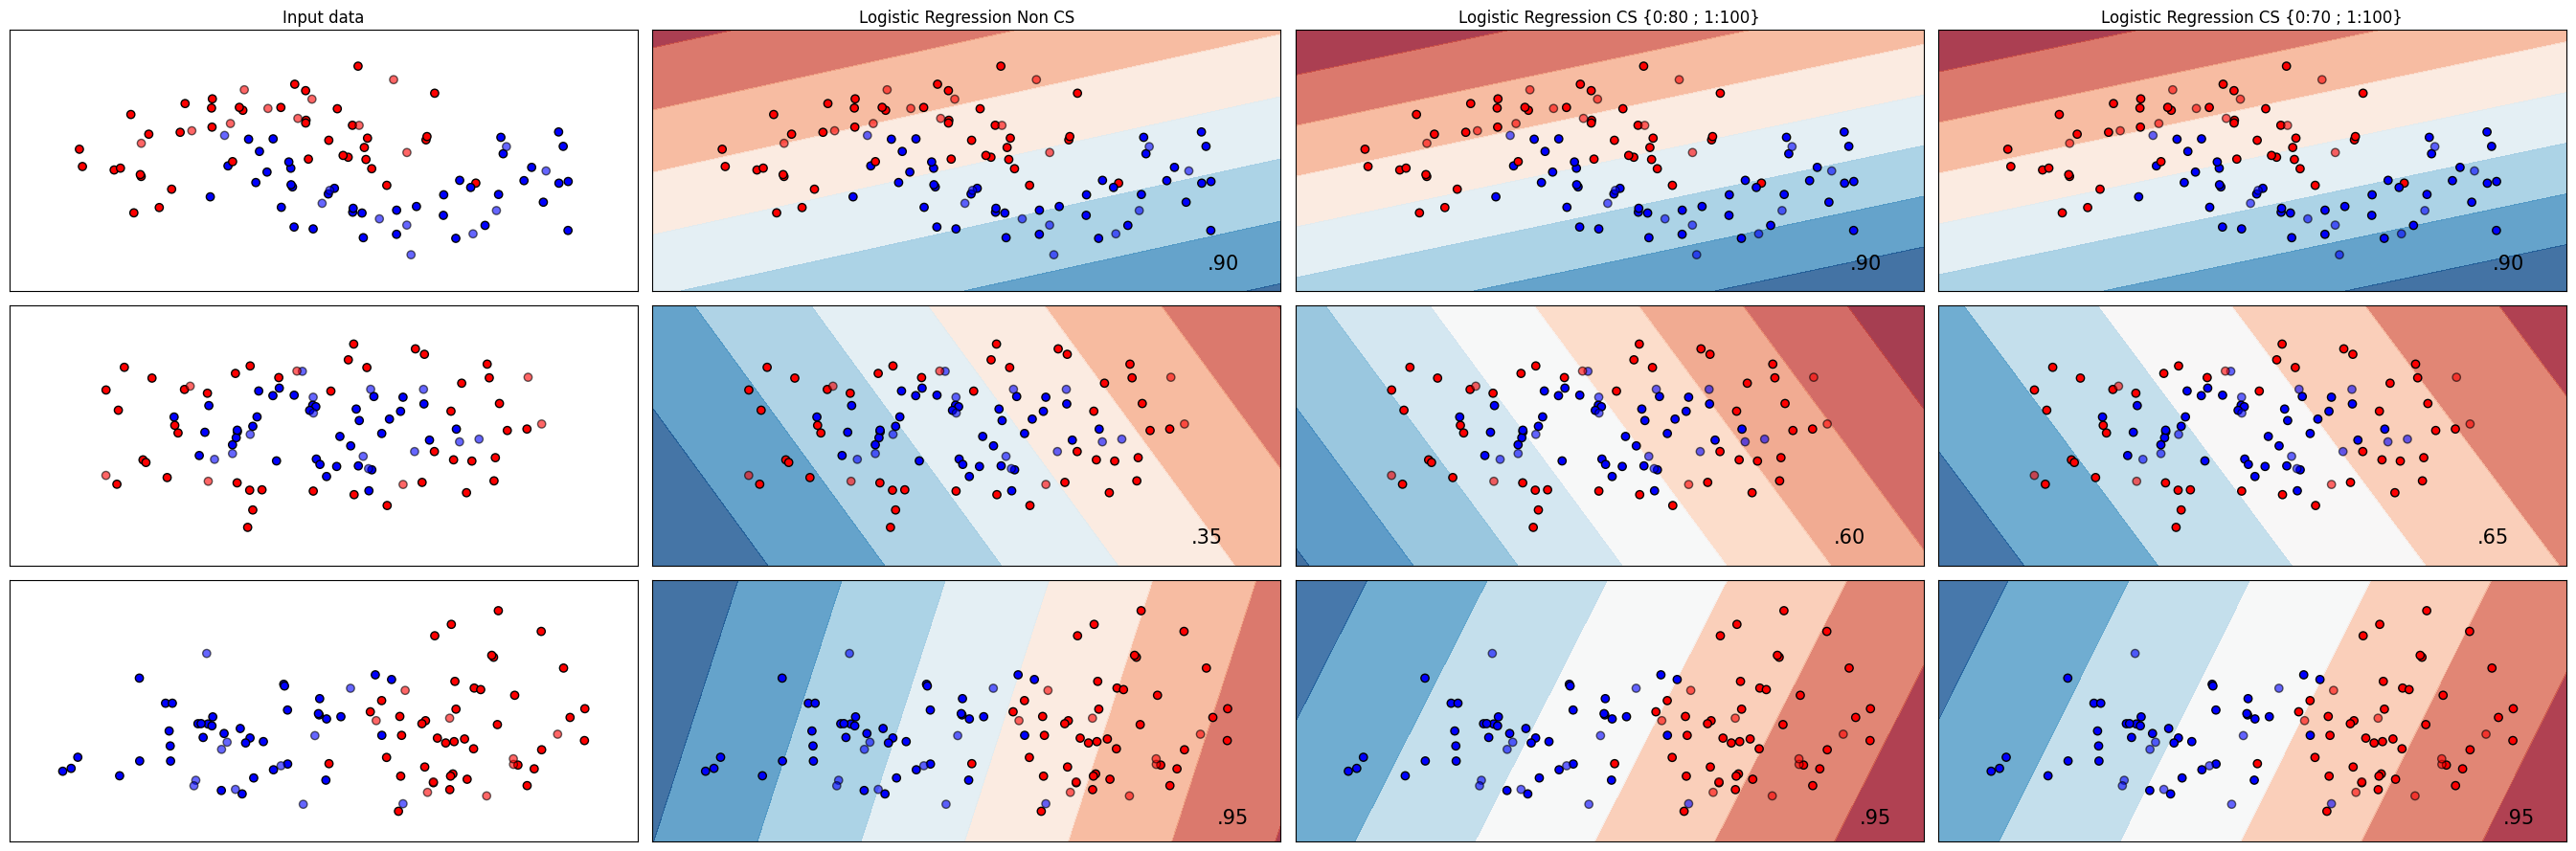

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


names = [
    "Logistic Regression Non CS",
    "Logistic Regression CS {0:80 ; 1:100}",
    "Logistic Regression CS {0:70 ; 1:100}",
]

classifiers = [
    LogisticRegression(),
    LogisticRegression(class_weight={0: 80, 1: 100}),
    LogisticRegression(class_weight={0: 70, 1: 100})
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900310 using {'class_weight': {0: 80, 1: 100}}
0.892296 (0.007075) with: {'class_weight': {0: 10, 1: 100}}
0.893441 (0.006876) with: {'class_weight': {0: 20, 1: 100}}
0.895780 (0.006170) with: {'class_weight': {0: 30, 1: 100}}
0.899443 (0.006570) with: {'class_weight': {0: 40, 1: 100}}
0.900217 (0.006274) with: {'class_weight': {0: 50, 1: 100}}
0.898387 (0.008075) with: {'class_weight': {0: 60, 1: 100}}
0.899288 (0.006569) with: {'class_weight': {0: 70, 1: 100}}
0.900310 (0.005836) with: {'class_weight': {0: 80, 1: 100}}
0.897279 (0.005953) with: {'class_weight': {0: 90, 1: 100}}
0.897570 (0.005186) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900997 using {'class_weight': {0: 80, 1: 100}}
0.889893 (0.007264) with: {'class_weight': {0: 10, 1: 100}}
0.890210 (0.007117) with: {'class_weight': {0: 20, 1: 100}}
0.893307 (0.007825) with: {'class_weight': {0: 30, 1: 100}}
0.897847 (0.007267) with: {'class_weight': {0: 40, 1: 100}}
0.900046 (0.006205) with: {'class_weight': {0: 50, 1: 100}}
0.898849 (0.007179) with: {'class_weight': {0: 60, 1: 100}}
0.899711 (0.007478) with: {'class_weight': {0: 70, 1: 100}}
0.900997 (0.004362) with: {'class_weight': {0: 80, 1: 100}}
0.899393 (0.005614) with: {'class_weight': {0: 90, 1: 100}}
0.900465 (0.004993) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.metrics import geometric_mean_score
classifier = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.6f' % (np.mean(auc)))
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('F1 score: %.6f' % (np.mean(score)))
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')
gm=cross_val_score(classifier, X, y, scoring=gm_scorer, cv=cv, n_jobs=-1)
print('Gmean score: %.6f' % (np.mean(gm)))

AUC ROC: 0.818731
F1 score: 0.630440
Gmean score: 0.709639


In [ ]:
# LR
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# define grid
balance1 = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847289 using {'class_weight': {0: 10, 1: 100}}
0.847289 (0.011296) with: {'class_weight': {0: 10, 1: 100}}
0.830136 (0.011659) with: {'class_weight': {0: 20, 1: 100}}
0.818642 (0.011787) with: {'class_weight': {0: 30, 1: 100}}
0.809768 (0.011886) with: {'class_weight': {0: 40, 1: 100}}
0.804590 (0.013832) with: {'class_weight': {0: 50, 1: 100}}
0.790744 (0.028124) with: {'class_weight': {0: 60, 1: 100}}
0.793977 (0.014961) with: {'class_weight': {0: 70, 1: 100}}
0.786027 (0.011859) with: {'class_weight': {0: 80, 1: 100}}
0.781651 (0.011861) with: {'class_weight': {0: 90, 1: 100}}
0.766247 (0.033537) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.721455 using {'class_weight': {0: 70, 1: 100}}
0.458092 (0.008738) with: {'class_weight': {0: 10, 1: 100}}
0.598684 (0.009739) with: {'class_weight': {0: 20, 1: 100}}
0.666566 (0.011842) with: {'class_weight': {0: 30, 1: 100}}
0.697126 (0.010324) with: {'class_weight': {0: 40, 1: 100}}
0.715764 (0.009419) with: {'class_weight': {0: 50, 1: 100}}
0.717450 (0.015771) with: {'class_weight': {0: 60, 1: 100}}
0.721455 (0.011233) with: {'class_weight': {0: 70, 1: 100}}
0.719239 (0.010668) with: {'class_weight': {0: 80, 1: 100}}
0.711130 (0.008355) with: {'class_weight': {0: 90, 1: 100}}
0.699518 (0.017653) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.737891 using {'class_weight': {0: 50, 1: 100}}
0.502505 (0.010607) with: {'class_weight': {0: 10, 1: 100}}
0.659355 (0.010330) with: {'class_weight': {0: 20, 1: 100}}
0.719238 (0.011484) with: {'class_weight': {0: 30, 1: 100}}
0.735526 (0.010385) with: {'class_weight': {0: 40, 1: 100}}
0.737891 (0.009124) with: {'class_weight': {0: 50, 1: 100}}
0.726086 (0.015445) with: {'class_weight': {0: 60, 1: 100}}
0.716343 (0.011940) with: {'class_weight': {0: 70, 1: 100}}
0.699901 (0.010485) with: {'class_weight': {0: 80, 1: 100}}
0.679149 (0.007924) with: {'class_weight': {0: 90, 1: 100}}
0.651794 (0.029960) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# LGB
from lightgbm import LGBMClassifier
model = LGBMClassifier()
# define grid
balance = [{0:0,1:0},{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
Best: 0.859246 using {'class_weight': {0: 1, 1: 1}}
0.500000 (0.000000) with: {'class_weight': {0: 0, 1: 0}}
0.849889 (0.007616) with: {'class_weight': {0: 100, 1: 1}}
0.856347 (0.006673) with: {'class_weight': {0: 10, 1: 1}}
0.859246 (0.007583) with: {'class_weight': {0: 1, 1: 1}}
0.856916 (0.008397) with: {'class_weight': {0: 1, 1: 10}}
0.843455 (0.009755) with: {'class_weight': {0: 1, 1: 100}}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
Best: 0.753279 using {'class_weight': {0: 1, 1: 1}}
0.443300 (0.000076) with: {'class_weight': {0: 0, 1: 0}}
0.646965 (0.008257) with: {'class_weight': {0: 100, 1: 1}}
0.670712 (0.009013) with: {'class_weight': {0: 10, 1: 1}}
0.753279 (0.009708) with: {'class_weight': {0: 1, 1: 1}}
0.688047 (0.009802) with: {'class_weight': {0: 1, 1: 10}}
0.571415 (0.012383) with: {'class_weight': {0: 1, 1: 100}}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.718950 -> initscore=0.939257
[LightGBM] [Info] Start training from score 0.939257
Best: 0.765116 using {'class_weight': {0: 1, 1: 10}}
0.000000 (0.000000) with: {'class_weight': {0: 0, 1: 0}}
0.495750 (0.012295) with: {'class_weight': {0: 100, 1: 1}}
0.532397 (0.011820) with: {'class_weight': {0: 10, 1: 1}}
0.683986 (0.012317) with: {'class_weight': {0: 1, 1: 1}}
0.765116 (0.009876) with: {'class_weight': {0: 1, 1: 10}}
0.679840 (0.012254) with: {'class_weight': {0: 1, 1: 100}}


In [ ]:
#XGB
from xgboost import XGBClassifier
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842307 using {'scale_pos_weight': 1}
0.842307 (0.006468) with: {'scale_pos_weight': 1}
0.833975 (0.008143) with: {'scale_pos_weight': 10}
0.827935 (0.009365) with: {'scale_pos_weight': 25}
0.825372 (0.010764) with: {'scale_pos_weight': 50}
0.826228 (0.011513) with: {'scale_pos_weight': 75}
0.823517 (0.011251) with: {'scale_pos_weight': 99}
0.823778 (0.010249) with: {'scale_pos_weight': 100}
0.814949 (0.012212) with: {'scale_pos_weight': 1000}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.744537 using {'scale_pos_weight': 1}
0.744537 (0.008734) with: {'scale_pos_weight': 1}
0.714044 (0.007668) with: {'scale_pos_weight': 10}
0.679693 (0.006015) with: {'scale_pos_weight': 25}
0.658275 (0.010234) with: {'scale_pos_weight': 50}
0.649390 (0.009572) with: {'scale_pos_weight': 75}
0.641528 (0.010878) with: {'scale_pos_weight': 99}
0.639217 (0.011532) with: {'scale_pos_weight': 100}
0.585385 (0.008535) with: {'scale_pos_weight': 1000}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752118 using {'scale_pos_weight': 10}
0.681332 (0.011354) with: {'scale_pos_weight': 1}
0.752118 (0.008503) with: {'scale_pos_weight': 10}
0.745778 (0.007474) with: {'scale_pos_weight': 25}
0.736300 (0.010786) with: {'scale_pos_weight': 50}
0.734082 (0.010751) with: {'scale_pos_weight': 75}
0.728458 (0.010232) with: {'scale_pos_weight': 99}
0.727249 (0.011391) with: {'scale_pos_weight': 100}
0.687335 (0.009477) with: {'scale_pos_weight': 1000}
